In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ast
from IPython.display import clear_output
import time

In [2]:
cross_corr_data = []
# Filename with path
filename='/home/groups/ZuckermanLab/jalim/LI204601_INCUCYTE/crossCorrCCRnuc/LI204601_P_A1_1.dat'
with open(filename, 'r') as file_in:
    for line in file_in:
        # Remove any leading/trailing whitespace
        line = line.strip()
        # If the line is not empty, convert it to a list and add to arrays
        if line:
            data = ast.literal_eval(line)
            cross_corr_data.append(data)
# 'arrays' is now a list of lists, each sublist is an array from the file

In [32]:
traj_lengths = [4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48]
traj_lengths = np.array(traj_lengths)
#print(traj_lengths)
cross_corr = np.zeros(traj_lengths.size)
new_size_cc = traj_lengths.size + 1 # Add one more for snippet length = 1 

for i, itl in enumerate(traj_lengths):
    sum_corr_traj = []
    for fi in range(0, len(cross_corr_data), 2):
        sum_corr_snip = []
        if len(cross_corr_data[fi]) > itl + 1:
            for ind_c in range(len(cross_corr_data[fi]) - itl):
                sum_corr = np.mean(np.array(cross_corr_data[fi][ind_c:ind_c + itl])) # Along all snippet
                sum_corr_snip.append(sum_corr)
            sum_corr_traj1 = np.mean(sum_corr_snip) # Along a single-cell trajectory
        sum_corr_traj.append(sum_corr_traj1)
    cross_corr[i] = np.mean(sum_corr_traj)  

# Trajectory snippet length = 1 
sum_corr_traj1 = []
for fi in range(0, len(cross_corr_data), 2):
    sum_corr = np.mean(np.array(cross_corr_data[fi]))
    sum_corr_traj1.append(sum_corr)
sum_corr_traj = np.mean(sum_corr_traj1)

expand_cross_corr = np.append(sum_corr_traj, cross_corr)
expand_traj_lengths = np.append(1, traj_lengths)

<Figure size 640x480 with 0 Axes>

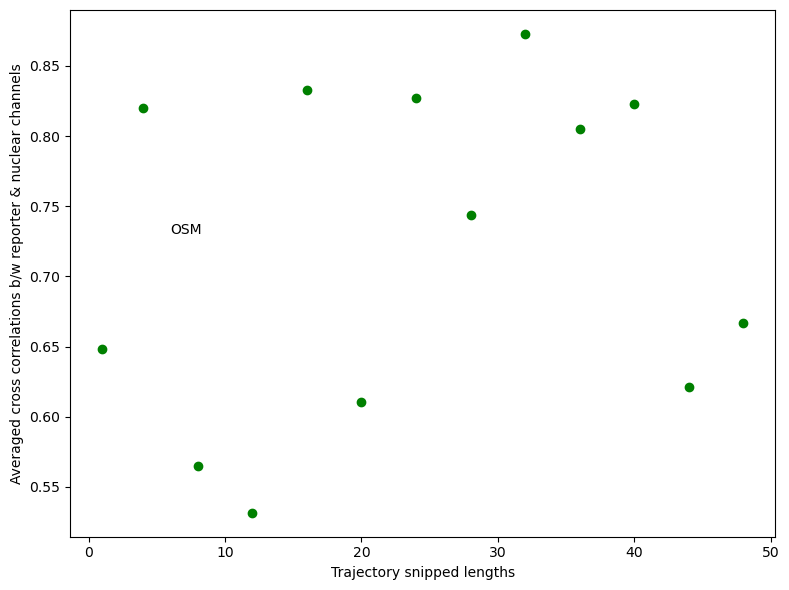

In [37]:
plt.clf()
fig, axs = plt.subplots(figsize = (8, 6)) 
axs.plot(expand_traj_lengths, expand_cross_corr, 'go')
axs.set_xlabel('Trajectory snipped lengths')
axs.set_ylabel('Averaged cross correlations b/w reporter & nuclear channels')
plt.text(6, 0.73, 'OSM')
#plt.show()
fig.tight_layout()
plt.savefig('cross_corr_OSM1_1.png', dpi = 300, bbox_inches='tight')

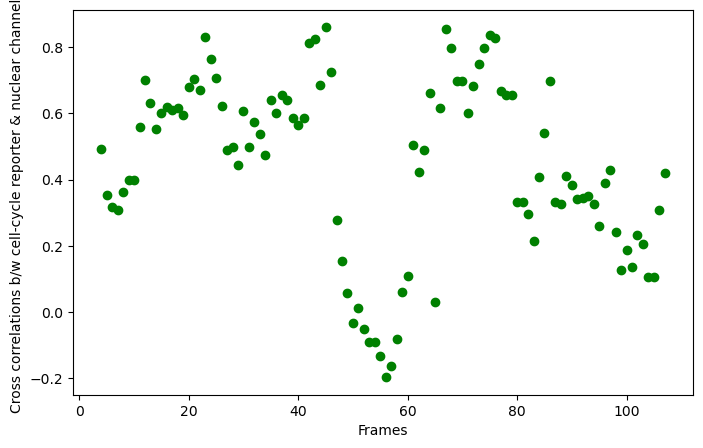

In [4]:
plt.clf()
#for fi in range(1, len(cross_corr_data), 2):
for fi in range(1, 100, 2):
    clear_output(wait=True)  # Clear the previous output (plot)
    fig, axs = plt.subplots(figsize = (8, 5)) 
    axs.plot(cross_corr_data[fi], cross_corr_data[fi - 1], 'go')
    axs.set_xlabel('Frames')
    axs.set_ylabel('Cross correlations b/w cell-cycle reporter & nuclear channels')
    plt.show()
    time.sleep(0.5)